In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from df_utils import * 

In [2]:
dt_variation = ['LYAttenuation',
                'LYDown',
                'LYRayleigh',
                'Recomb',
                'SCE',
                'WireModdEdX',
                'WireModThetaXZ',
                'WireModThetaYZ_withouts',
                'WireModX',
                'WireModYZ']
                
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/"
figure_path = '/home/lmlepin/Desktop/Plots_DT_Drive/2023/det_var/'

In [3]:

df_list = []
df_cv = pd.read_csv(base_dir + "run1_CV_CNN_scores_8441_steps.csv")
df_cv = make_unique_ev_id(df_cv)
#df_cv = Edit_Weight_Tune(df_cv)
#MC_weight_branch(df_cv)
#df_cv = filter_df(df_cv)
df_list.append(df_cv)
df_cv.head()

,entry,run_number,subrun_number,event_number,reco_asso_showers,reco_asso_tracks,reco_vertex_x,reco_vertex_y,reco_vertex_z,reco_shower_energy_max,reco_shower_dirx,reco_shower_diry,reco_shower_dirz,cos_theta,theta,signal_score,rse_id
0,190,5576.0,97.0,4889.0,2.0,0.0,207.580170,64.014450,930.317627,112.560904,0.412199,-0.910956,-0.015828,-0.079838,94.579241,0.015350,5576.0_97.0_4889.0
1,232,5933.0,51.0,2578.0,1.0,0.0,60.284676,63.264519,543.793213,487.598851,0.935057,-0.334534,0.117285,0.154614,81.105587,0.001669,5933.0_51.0_2578.0
2,249,5933.0,55.0,2753.0,2.0,0.0,121.335510,-7.092843,258.120636,312.872947,-0.223011,-0.257681,0.940142,0.886894,27.514452,0.113532,5933.0_55.0_2753.0
3,306,5947.0,74.0,3729.0,1.0,0.0,133.354614,-41.578945,665.870850,195.261196,0.787327,0.606912,0.108504,0.234192,76.456020,0.000715,5947.0_74.0_3729.0
4,307,5947.0,74.0,3743.0,1.0,0.0,222.458542,68.046967,845.039917,238.550328,0.071487,-0.997282,0.017841,-0.082550,94.735138,0.032408,5947.0_74.0_3743.0


In [4]:

for var in dt_variation:
    file_name=base_dir + "run1_"+ var +"_CNN_scores_8441_steps.csv"
    print("Opening file: " + file_name)
    df = pd.read_csv(file_name)
    df = make_unique_ev_id(df)
    #df = Edit_Weight_Tune(df)
    #MC_weight_branch(df)
    #df = filter_df(df)
    df_list.append(df)
    #dataL= data.to_numpy()
    #names['bdt_' + str(var)] = dataL
    #names['weight_' + str(var)] = w


Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_LYAttenuation_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_LYDown_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_LYRayleigh_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_Recomb_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_SCE_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_WireModdEdX_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_WireModThetaXZ_CNN_scores_8441_steps.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run1_det_vars/run1_WireModThetaYZ_withouts_CNN_scores_8441_steps.csv
Opening fi

In [5]:
#common_list = make_common_evs_df(df_list)

In [6]:
#for i in range(len(df_list)):
#     df_list[i] = df_list[i].loc[(df_list[i]['rse_id'].isin(common_list['rse_id']))]

/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


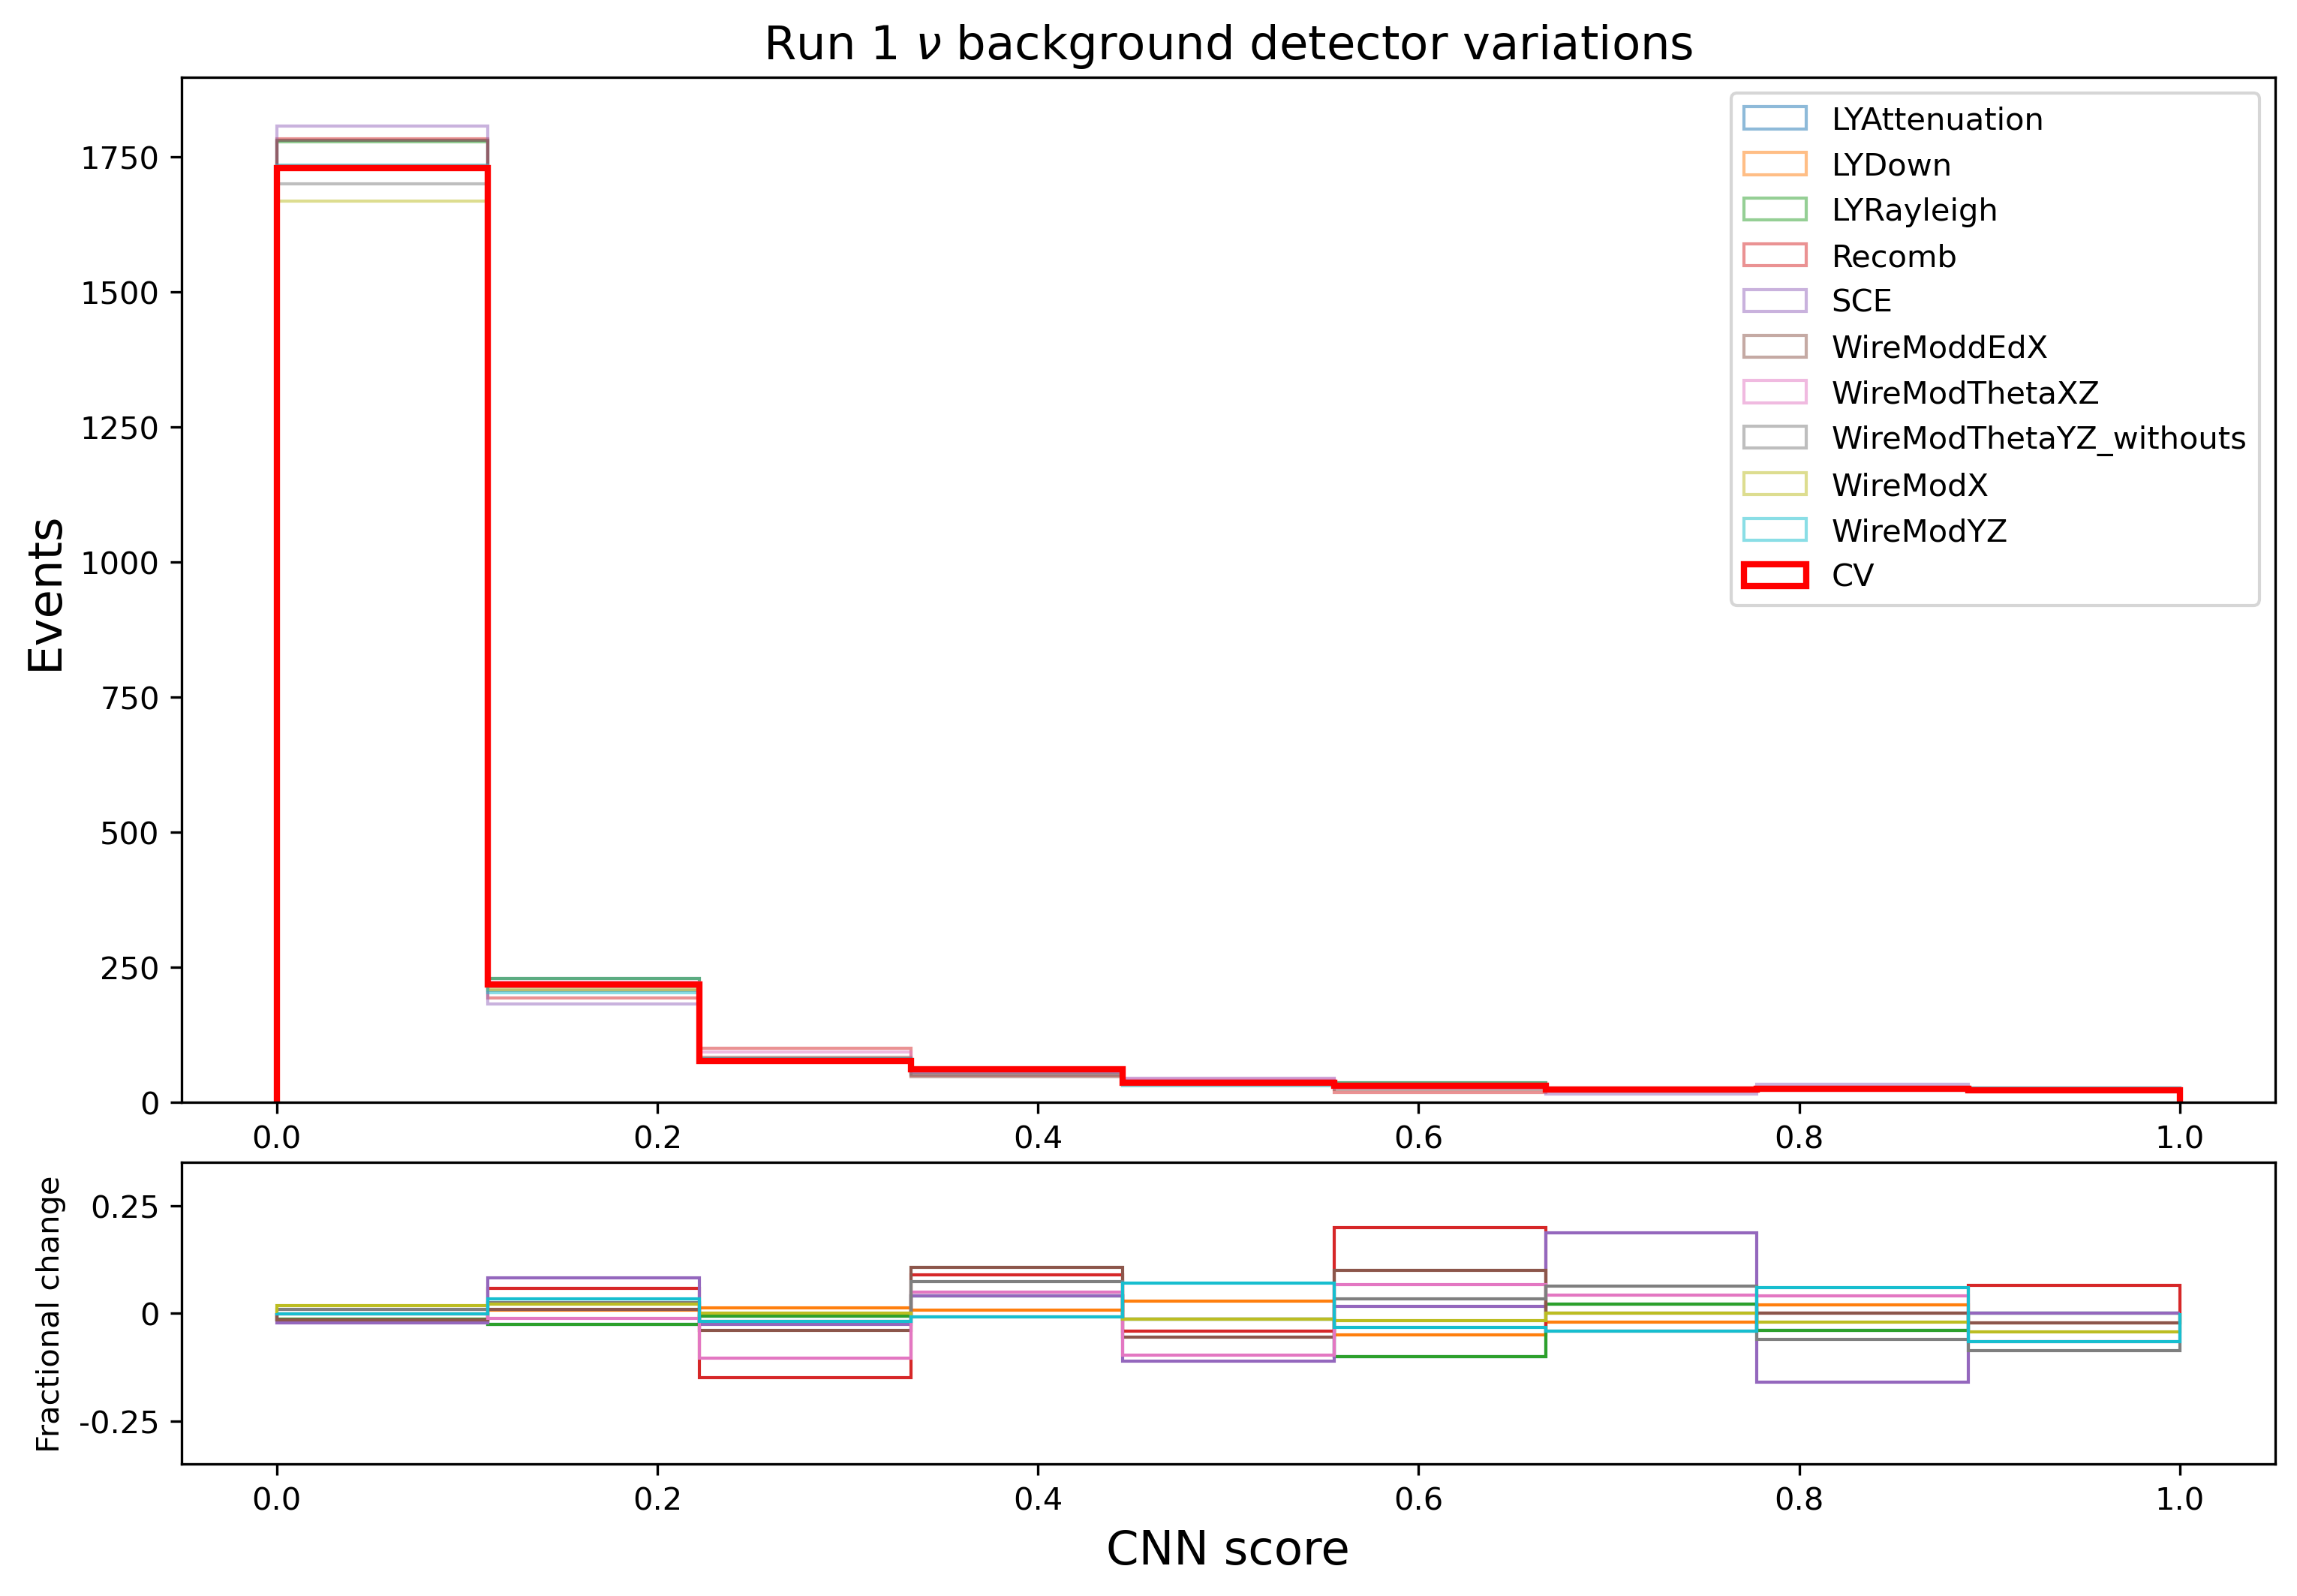

In [7]:
min_val = 0. #np.min(df_list[0]['bdt_score'])
max_val = 1. #np.max(df_list[0]['bdt_score'])
nbins = 10

fig = plt.figure(figsize=(12, 8),dpi=300)
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.)
main_ax = fig.add_subplot(grid[:-1, :])
x_hist = fig.add_subplot(grid[-1, :], yticklabels=[-0.5,-0.25,0,0.25,0.5], sharex=main_ax)

main_ax.set_title(r'Run 1 $\nu$ background detector variations',size=15)
plt.xlabel('CNN score',size=15)
main_ax.set_ylabel(r'Events',size=15)
x_hist.set_ylabel('Fractional change',size=10)


(counts_cv, bins_cv) = np.histogram(df_list[0]['signal_score'], bins=np.linspace(min_val,max_val,nbins))
df_list.pop(0)
count_list = 0 

error = np.zeros(nbins-1)

for df in df_list: 
    (counts, bins) = np.histogram(df['signal_score'], bins=np.linspace(min_val,max_val,nbins))
    main_ax.hist(bins[:-1], bins, weights=counts,alpha=0.5, histtype='step',log=False,label=dt_variation[count_list])
    ratio = (counts_cv - counts) / counts_cv
    x_hist.hist(bins[:-1],bins,weights=ratio,histtype='step',orientation='vertical',label=str(var)) 
    error=ratio**2+error
    count_list+=1
main_ax.hist(bins_cv[:-1], bins_cv, weights=counts_cv, histtype='step',lw=2,label='CV',color='red',log=False)
main_ax.legend()
x_hist.set_ylim([-0.7,0.7])
plt.savefig(figure_path + "run1_det_var_cnn_dist.png")
plt.show()

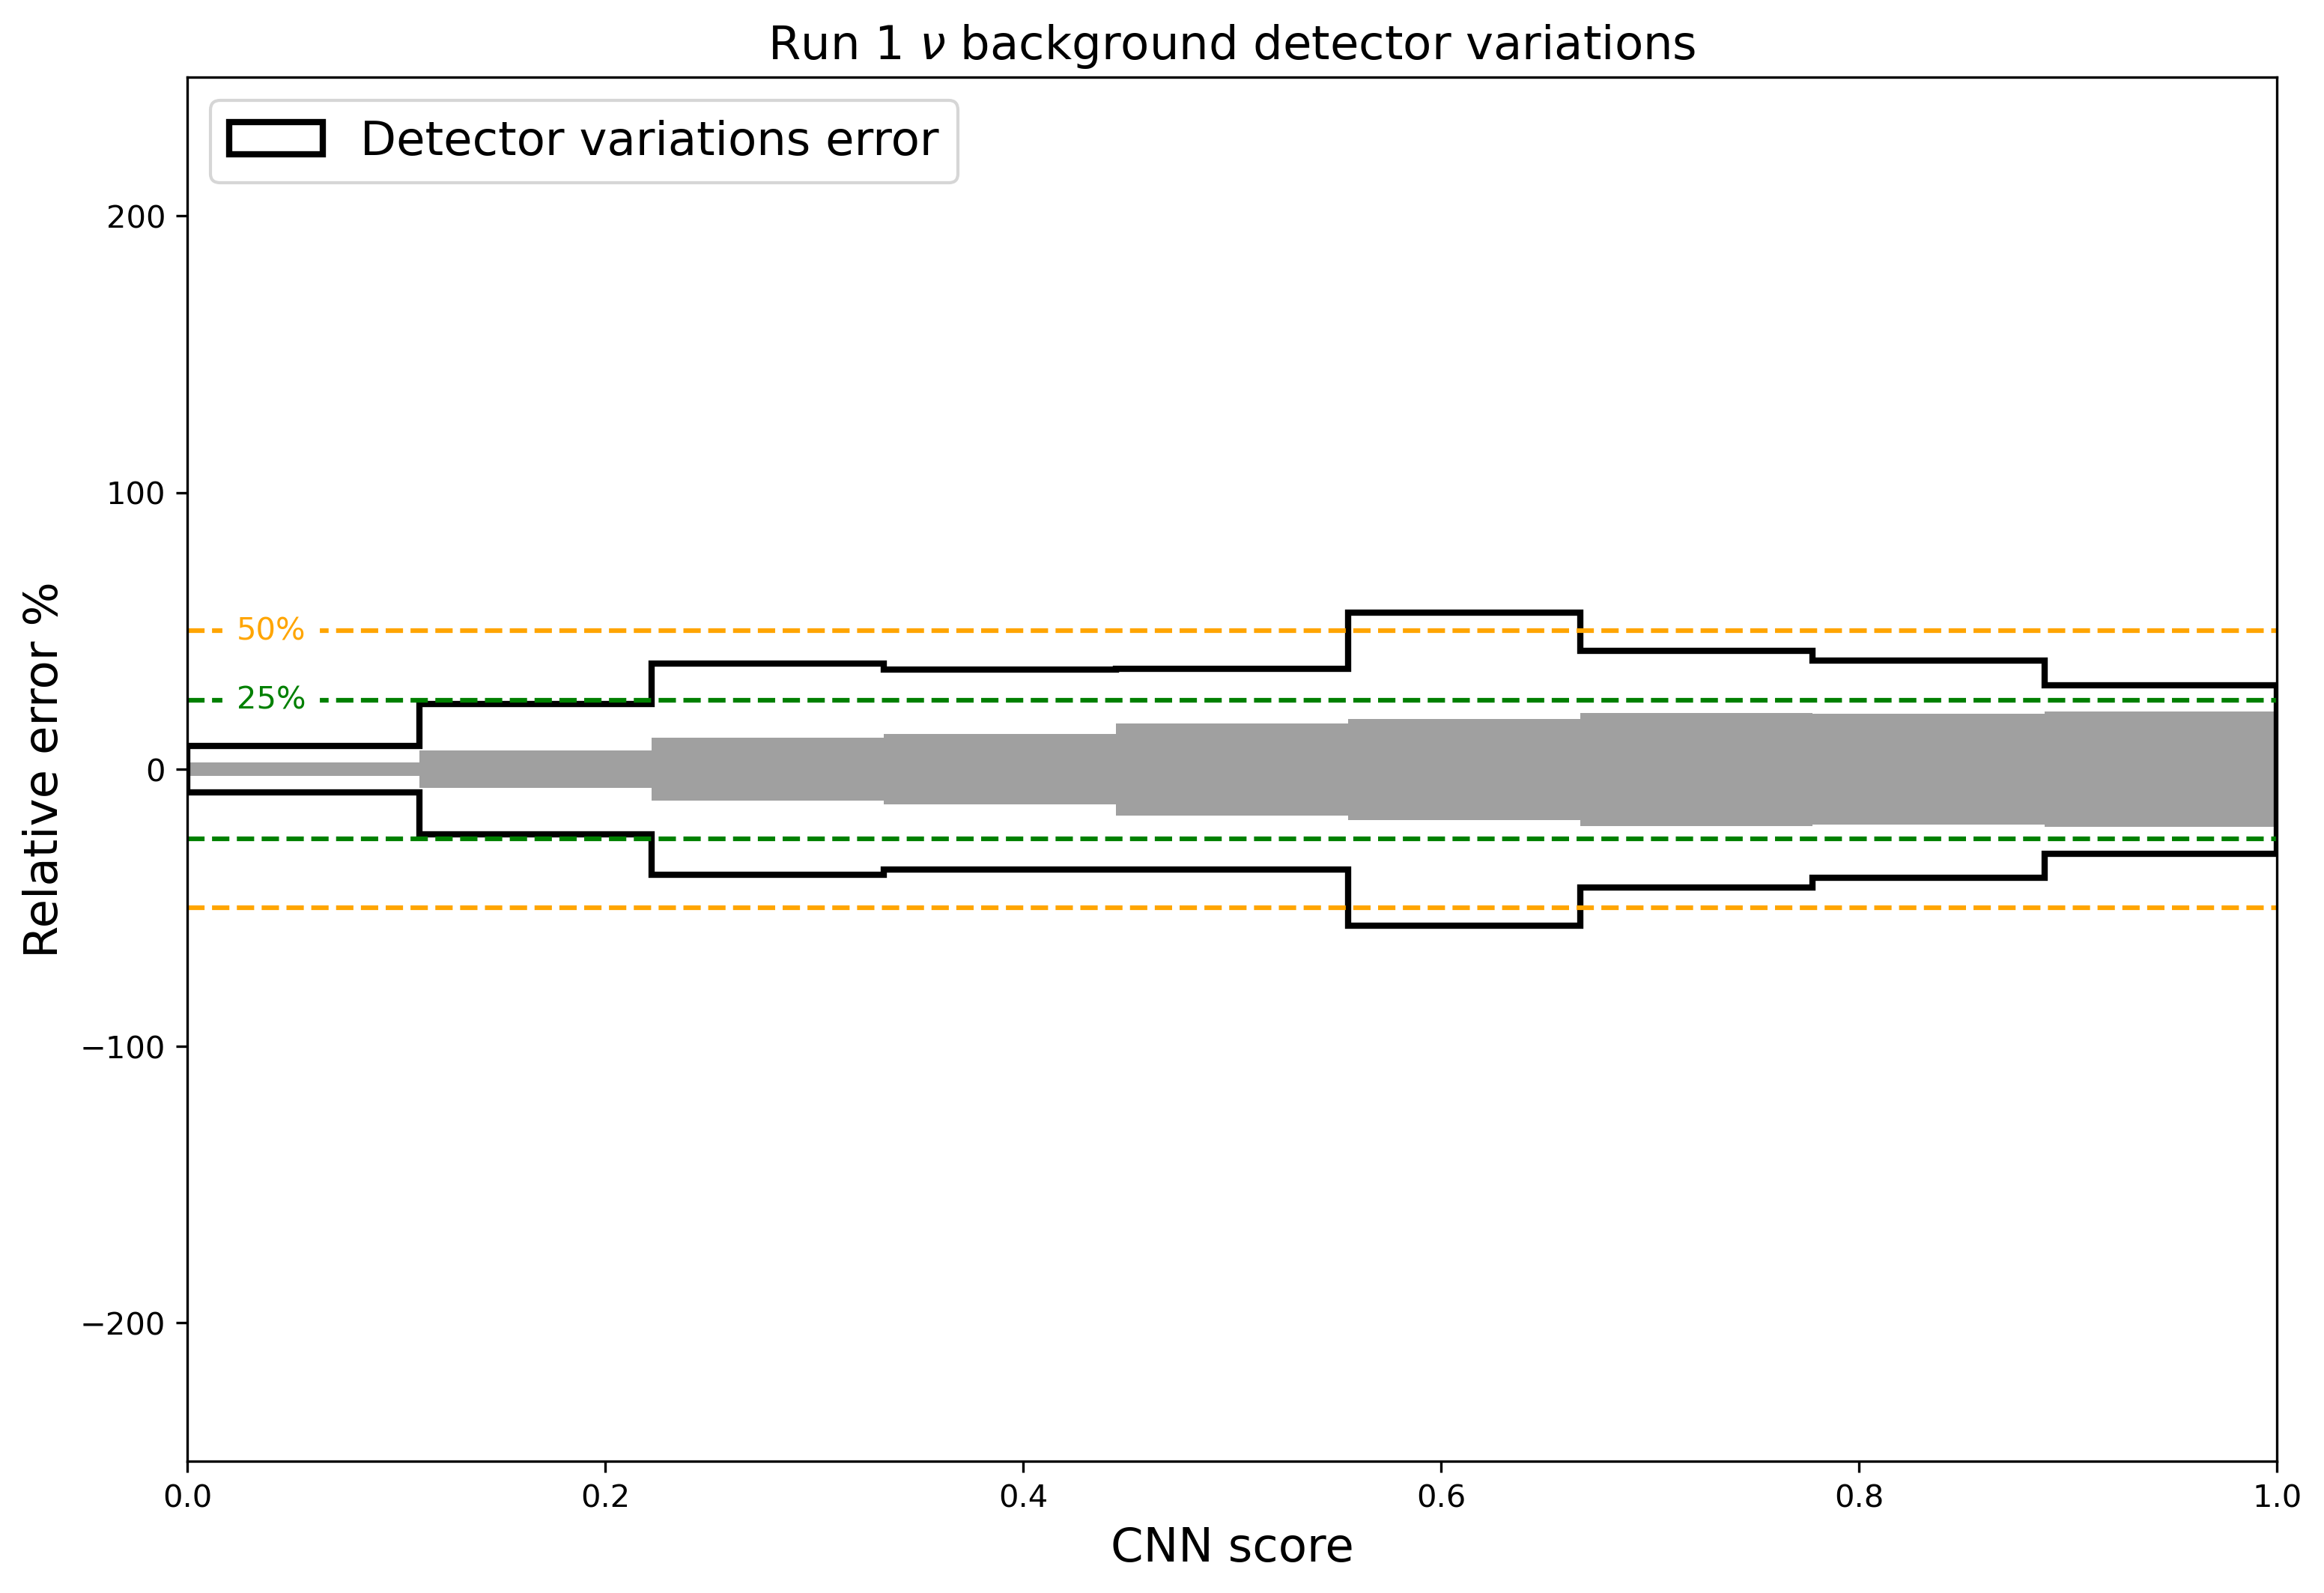

In [8]:
plt.figure(figsize=(12,8),dpi=300)
plt.xlabel('CNN score',size=15)
plt.ylabel(r'Relative error %',size=15)
plt.title(r'Run 1 $\nu$ background detector variations',size=15)
err=np.sqrt(error)
plt.hist(bins[:-1],bins, weights = (np.sqrt(counts_cv)/counts_cv)*100, histtype = 'stepfilled', color ='gray',alpha=0.75)
plt.hist(bins[:-1],bins, weights = -1.*(np.sqrt(counts_cv)/counts_cv)*100, histtype = 'stepfilled', color ='gray',alpha=0.75)
plt.hist(bins[:-1],bins,weights=err*100,histtype='step',color='black',label='Detector variations error',lw=2) 
plt.hist(bins[:-1],bins,weights=-err*100,histtype='step',color='black',lw=2) 
plt.hlines(25,0,1,linestyles='dashed',color='green')
plt.text(0.04,25, '25%', fontsize=10, va='center', ha='center',color='green', backgroundcolor='w')
plt.hlines(-25,0,1,linestyles='dashed',color='green')
plt.hlines(50,0,1,linestyles='dashed',color='orange')
plt.text(0.04,50, '50%', fontsize=10, va='center', ha='center',color='orange', backgroundcolor='w')
plt.hlines(-50,0,1,linestyles='dashed',color='orange')
plt.xlim(0,1)
plt.ylim(-250,250)
plt.legend(fontsize=15,loc='upper left')
plt.savefig(figure_path + "run1_det_var_total_uncertainty_cnn.png")
plt.show()